**Корректность проверена на Python 3.6:**
+ matplotlib 3.0.2
+ sklearn 0.20.2

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Sklearn

## sklearn.metrics

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [2]:
from sklearn import model_selection, datasets, linear_model, metrics 
from matplotlib.colors import ListedColormap

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация датасетов

In [217]:
clf_data, clf_target = datasets.make_classification(n_features = 2, n_informative = 2, n_classes = 2, 
                                                    n_redundant = 0, n_clusters_per_class = 1, 
                                                    random_state = 232)

In [180]:
reg_data, reg_target = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                                noise = 5., random_state = 7)

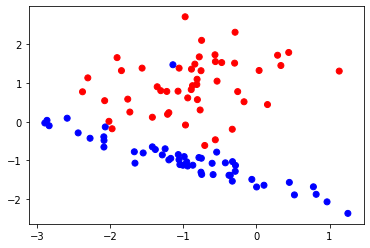

In [218]:
colors = ListedColormap(['red', 'blue'])
pylab.scatter(clf_data[:,0], clf_data[:,1], c = clf_target, cmap = colors)

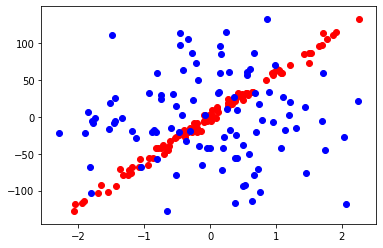

In [219]:
pylab.scatter(reg_data[:,1], reg_target, color = 'r')
pylab.scatter(reg_data[:,0], reg_target, color = 'b')

In [220]:
clf_train_data, clf_test_data, clf_train_labels, clf_test_labels = model_selection.train_test_split(clf_data, clf_target,
                                                                                     test_size = 0.3, random_state = 1)

In [221]:
reg_train_data, reg_test_data, reg_train_labels, reg_test_labels = model_selection.train_test_split(reg_data, reg_target,
                                                                                     test_size = 0.3, random_state = 1)

### Метрики качества в задачах классификации

#### Обучение модели классификации

In [222]:
classifier = linear_model.SGDClassifier(loss = 'log', random_state = 1, max_iter=1000)

In [223]:
classifier.fit(clf_train_data, clf_train_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=1, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [224]:
predictions = classifier.predict(clf_test_data)

In [225]:
probability_predictions = classifier.predict_proba(clf_test_data)

In [226]:
print(clf_test_labels)

[1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0]


In [227]:
print(predictions)

[1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0]


In [228]:
print(probability_predictions)

[[4.93827201e-13 1.00000000e+00]
 [5.40276712e-11 1.00000000e+00]
 [8.22986124e-12 1.00000000e+00]
 [1.00000000e+00 1.38963685e-22]
 [1.81830240e-09 9.99999998e-01]
 [2.94875235e-13 1.00000000e+00]
 [1.00000000e+00 2.80073623e-11]
 [2.64274632e-07 9.99999736e-01]
 [1.00000000e+00 8.72085113e-41]
 [1.00000000e+00 4.19368494e-46]
 [1.00000000e+00 9.71631992e-31]
 [1.92168138e-03 9.98078319e-01]
 [4.55245441e-09 9.99999995e-01]
 [1.00000000e+00 3.71413625e-27]
 [2.57571742e-14 1.00000000e+00]
 [3.56384877e-09 9.99999996e-01]
 [1.00000000e+00 1.11758063e-17]
 [1.84817502e-08 9.99999982e-01]
 [1.52240887e-10 1.00000000e+00]
 [5.19568395e-08 9.99999948e-01]
 [1.09245946e-13 1.00000000e+00]
 [1.15441894e-04 9.99884558e-01]
 [1.00000000e+00 4.17547118e-50]
 [1.84580493e-05 9.99981542e-01]
 [1.00000000e+00 5.38519008e-15]
 [1.80522264e-13 1.00000000e+00]
 [1.00000000e+00 1.82068323e-24]
 [8.65973959e-15 1.00000000e+00]
 [2.96613140e-04 9.99703387e-01]
 [1.00000000e+00 2.06696885e-40]]


#### accuracy

In [229]:
sum([1. if pair[0] == pair[1] else 0. for pair in zip(clf_test_labels, predictions)])/len(clf_test_labels)

0.9333333333333333

In [230]:
metrics.accuracy_score(clf_test_labels, predictions)

0.9333333333333333

#### confusion matrix

In [231]:
matrix = metrics.confusion_matrix(clf_test_labels, predictions)
print(matrix)

[[10  1]
 [ 1 18]]


In [232]:
sum([1 if pair[0] == pair[1] else 0 for pair in zip(clf_test_labels, predictions)]) # на скольких объектах ответили правильно

28

In [233]:
matrix.diagonal().sum()

28

#### precision 

In [234]:
metrics.precision_score(clf_test_labels, predictions, pos_label = 0) # при отнесении конкретно к классу 0

0.9090909090909091

In [235]:
metrics.precision_score(clf_test_labels, predictions) # по умолчанию к классу 1

0.9473684210526315

In [236]:
metrics.precision_score(clf_test_labels, predictions, pos_label = 1) 

0.9473684210526315

#### recall

In [237]:
metrics.recall_score(clf_test_labels, predictions, pos_label = 0) # при отнесении конкретно к классу 0

0.9090909090909091

In [238]:
metrics.recall_score(clf_test_labels, predictions)

0.9473684210526315

#### f1

In [239]:
metrics.f1_score(clf_test_labels, predictions, pos_label = 0)

0.9090909090909091

In [240]:
metrics.f1_score(clf_test_labels, predictions)

0.9473684210526315

#### classification report

In [241]:
print(metrics.classification_report(clf_test_labels, predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.95      0.95      0.95        19

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



#### ROC curve

In [242]:
fpr, tpr, _ = metrics.roc_curve(clf_test_labels, probability_predictions[:,1])

In [243]:
print(fpr, tpr)

[0.         0.         0.         0.09090909 0.09090909 0.63636364
 0.63636364 1.        ] [0.         0.05263158 0.84210526 0.84210526 0.94736842 0.94736842
 1.         1.        ]


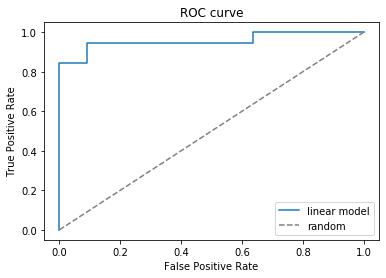

In [244]:
pylab.plot(fpr, tpr, label = 'linear model')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")

#### ROC AUC

In [245]:
metrics.roc_auc_score(clf_test_labels, predictions) # отличается, так как может изменяться порядок (для вероятностей порядок важен)

0.9282296650717702

In [246]:
metrics.roc_auc_score(clf_test_labels, probability_predictions[:,1])

0.9569377990430621

#### PR AUC

In [249]:
metrics.average_precision_score(clf_test_labels, predictions)

0.9308402585410894

#### log_loss

In [250]:
metrics.log_loss(clf_test_labels, probability_predictions[:,1])

1.4535919541892093

### Метрики качества в задачах регрессии

#### Обучение регрессионной модели 

In [251]:
regressor = linear_model.SGDRegressor(random_state = 1, max_iter = 20)

In [252]:
regressor.fit(reg_train_data, reg_train_labels)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=20,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=1,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [253]:
reg_predictions = regressor.predict(reg_test_data)

In [254]:
print(reg_test_labels)

[   2.67799047    7.06525927  -56.43389936   10.08001896  -22.46817716
  -19.27471232   59.44372825  -21.60494574   32.54682713  -41.89798772
  -18.16390935   32.75688783   31.04095773    2.39589626   -5.04783924
  -70.20925097   86.69034305   18.50402992   32.31573461 -101.81138022
   15.14628858   29.49813932   97.282674     25.88034991  -41.63332253
  -92.11198201   86.7177122     2.13250832  -20.24967575  -27.32511755]


In [255]:
print(reg_predictions)

[ -1.46503565   5.75776789 -50.13234306   5.05646094 -24.09370893
  -8.34831546  61.77254998 -21.98350565  30.65112022 -39.25972497
 -17.19337022  30.94178225  26.98820076  -6.08321732  -3.46551
 -78.9843398   84.80190097  14.80638314  22.91302375 -89.63572717
  14.5954632   31.64431951  95.81031534  21.5037679  -43.1101736
 -95.06972123  86.70086546   0.47837761 -16.44594704 -22.72581879]


#### mean absolute error

In [256]:
metrics.mean_absolute_error(reg_test_labels, reg_predictions)

3.748761311885298

#### mean squared error

In [257]:
metrics.mean_squared_error(reg_test_labels, reg_predictions)

24.114925597460914

#### root mean squared error

In [260]:
sqrt(metrics.mean_squared_error(reg_test_labels, reg_predictions))

4.91069502183356

#### r2 score

In [261]:
metrics.r2_score(reg_test_labels, reg_predictions)

0.989317615054695